In [1]:
import matplotlib.pyplot as plt

#set path to image
# path="mask_spam2017V2r1_SSA_A_COCO_A.tif"
path='../data/spam2017V2r1_SSA_P_COCO_A.tif'

tiff = plt.imread(path)

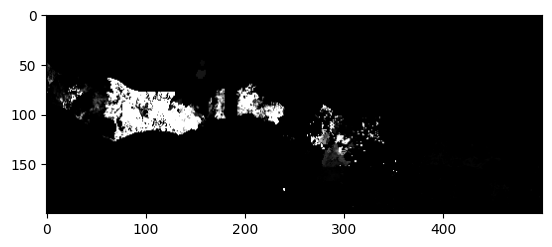

In [2]:
plt.imshow(tiff[900:1100,2000:2500, :])

In [3]:
tiff.shape

(2160, 4320, 4)

In [4]:
from osgeo import gdal
ds = gdal.Open(path)
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3] 

/Users/neu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [5]:
minx, maxx, miny, maxy

(-180.0, 179.99856, -89.99928, 90.0)

In [6]:
ds.RasterXSize, ds.RasterYSize, gt

(4320, 2160, (-180.0, 0.083333, 0.0, 90.0, 0.0, -0.083333))

In [7]:
import rasterio

#Alternatively Open IMage with rasterio
dataset_rasterio = rasterio.open(path)

In [8]:
ds.ReadAsArray().shape

(2160, 4320)

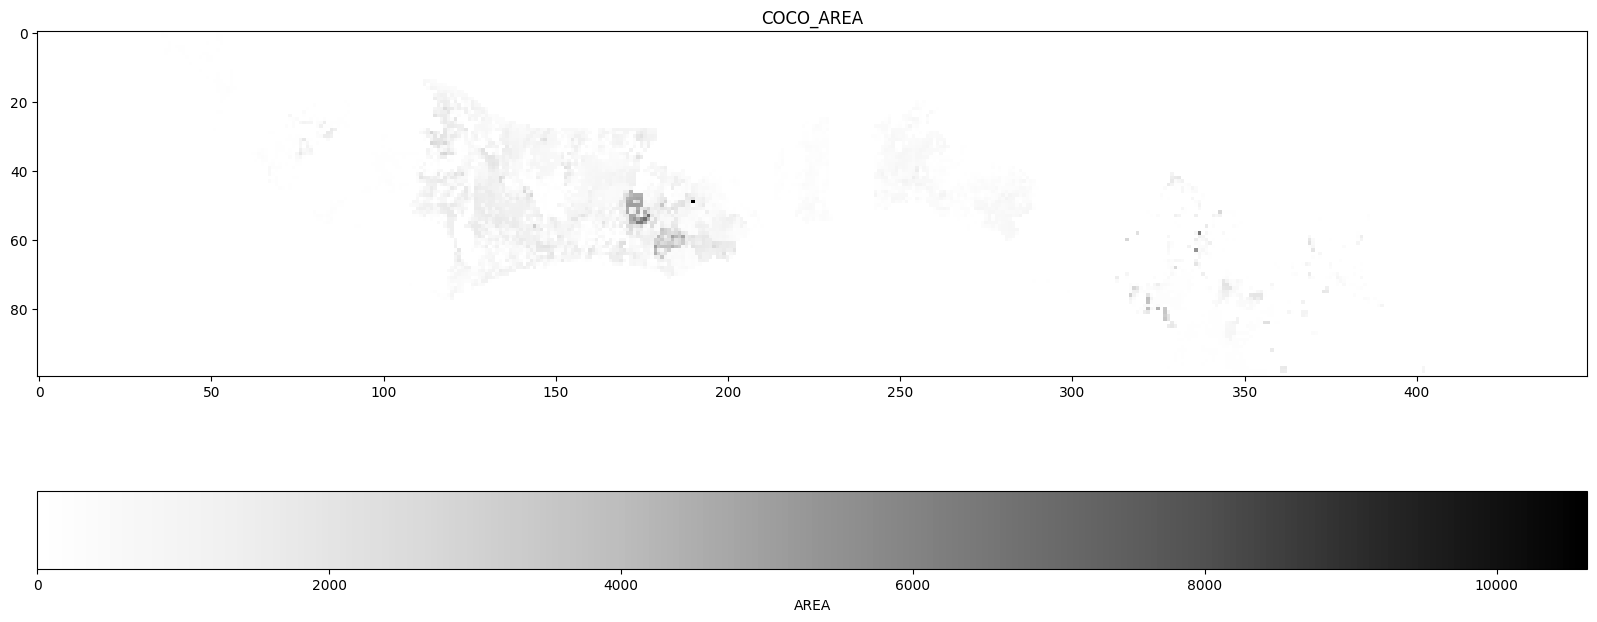

In [9]:
# Read the raster data
data = ds.ReadAsArray()

x_min = 950
x_max = 1050
y_min = 1950
y_max = 2400
     
     
# Plot the raster data using matplotlib
plt.figure(figsize=(20,10)) 
plt.imshow(data[x_min:x_max, y_min:y_max], cmap='Greys')
plt.title('COCO_AREA')
plt.colorbar(label='AREA', location = 'bottom')
plt.show()

In [10]:
data[x_min:x_max, y_min:y_max].max()

10622.2

In [11]:
# from ipywidgets import interact

# @interact
# def f_lambda(x):
#     return 5000 if (x>5000) else x

import ipywidgets as widgets
import numpy as np

top_range = widgets.IntSlider(
    value=5000,
    min=data[x_min:x_max, y_min:y_max].min(),
    max=data[x_min:x_max, y_min:y_max].max(),
)

# @widgets.interact_manual(top_range=(data[x_min:x_max, y_min:y_max].min(), data[x_min:x_max, y_min:y_max].max()))
f = lambda x: top_range.value if(x > top_range.value) else x

f_vec = np.vectorize(f)
top_range


IntSlider(value=5000, max=10622, min=-1)

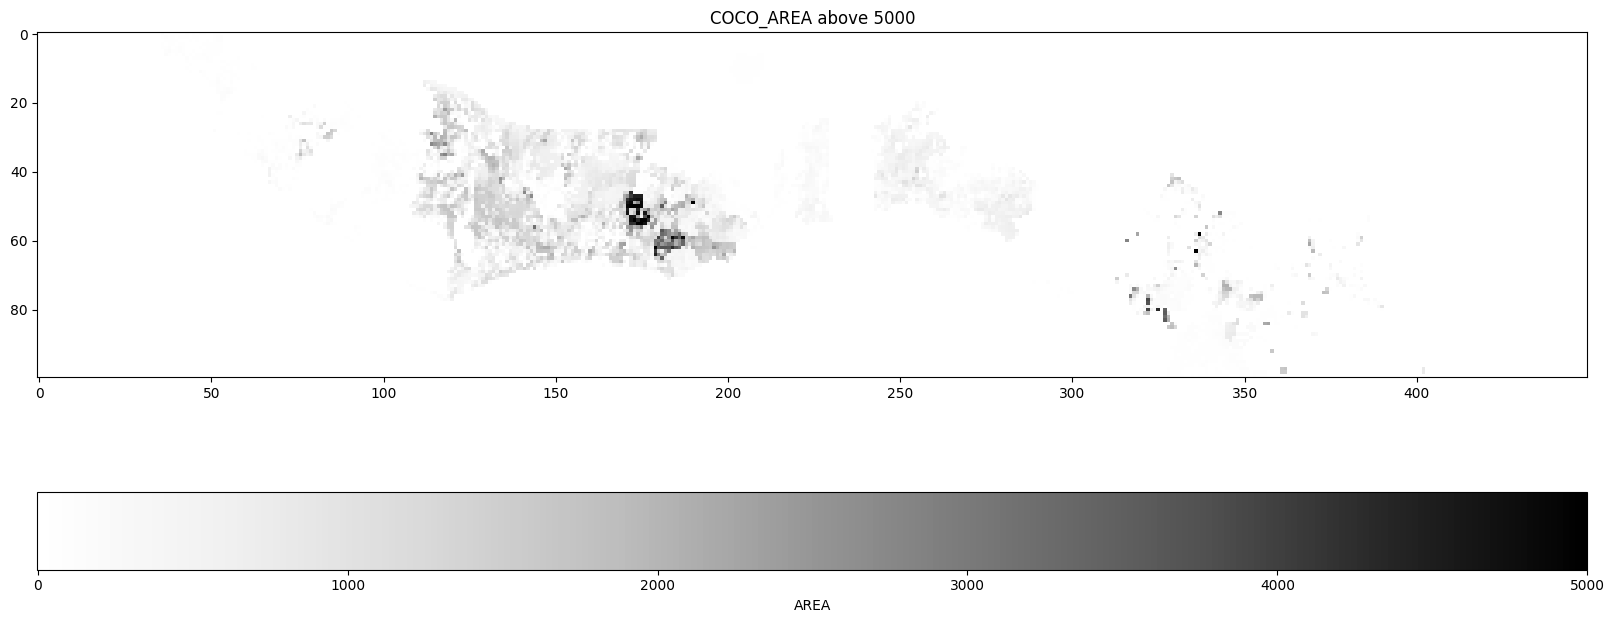

Number of pixels: 9 / (100, 450)


In [12]:
# Plot the raster data using matplotlib
sub_data = f_vec(data[x_min:x_max, y_min:y_max])
plt.figure(figsize=(20,10)) 
plt.imshow(sub_data, cmap='Greys')
plt.title(f'COCO_AREA above {top_range.value}')
plt.colorbar(label='AREA', location = 'bottom')
plt.show()

print(f'Number of pixels: {np.sum(sub_data==top_range.value)} / {sub_data.shape}')

In [13]:
from ipywidgets import interact
import numpy as n

@interact(top_range=widgets.IntSlider(
    value=5000,
    min=data[x_min:x_max, y_min:y_max].min(),
    max=data[x_min:x_max, y_min:y_max].max())
         )
def g(top_range):
    # @widgets.interact_manual(top_range=(data[x_min:x_max, y_min:y_max].min(), data[x_min:x_max, y_min:y_max].max()))
    f = lambda x: top_range if(x > top_range) else x

    f_vec = np.vectorize(f)

    # Plot the raster data using matplotlib
    sub_data = f_vec(data[x_min:x_max, y_min:y_max])
    plt.figure(figsize=(20,10)) 
    plt.imshow(sub_data, cmap='rainbow')
    plt.title(f'COCO_AREA above {top_range}')
    plt.colorbar(label='AREA', location = 'bottom')
    plt.show()

    print(f'Number of pixels: {np.sum(sub_data==top_range)} / {sub_data.shape}')

interactive(children=(IntSlider(value=5000, description='top_range', max=10622, min=-1), Output()), _dom_class…

In [14]:
@interact(top_vals=widgets.IntSlider(
    value=10,
    min=0,
    max=data[x_min:x_max, y_min:y_max].shape[0] * data[x_min:x_max, y_min:y_max].shape[1])
         )
def get_top_vals(top_vals):
    def largest_indices(ary, n):
        """Returns the n largest indices from a numpy array."""
        flat = ary.flatten()
        indices = np.argpartition(flat, -n)[-n:]
        indices = indices[np.argsort(-flat[indices])]
        return np.unravel_index(indices, ary.shape)

    sub_data = data #[x_min:x_max, y_min:y_max]
    index_array = largest_indices(sub_data, top_vals)
    print(f'top {top_vals} values: \n{sub_data[index_array]} \nat indices \n{index_array}')
    return index_array

interactive(children=(IntSlider(value=10, description='top_vals', max=45000), Output()), _dom_classes=('widget…

In [15]:
col, row, band = ds.RasterXSize, ds.RasterYSize, ds.RasterCount
print(col, row, band)


4320 2160 1


In [16]:
xoff, a, b, yoff, d, e = ds.GetGeoTransform()
print(xoff, a, b, yoff, d, e)

# details about the params: GDAL affine transform parameters
# xoff,yoff = left corner 
# a,e = weight,height of pixels
# b,d = rotation of the image (zero if image is north up)

-180.0 0.083333 0.0 90.0 0.0 -0.083333


In [17]:
def pixel2coord(x, y):
    """Returns global coordinates from coordinates x,y of the pixel"""
    xp = a * x + b * y + xoff
    yp = d * x + e * y + yoff
    return(xp, yp)

In [18]:
x,y = pixel2coord(col/2,row/2)
print (x, y)

-0.0007200000000011642 0.0003600000000005821


In [19]:
# get the existing coordinate system
old_cs= osr.SpatialReference()
old_cs.ImportFromWkt(ds.GetProjectionRef())

# create the new coordinate system
wgs84_wkt = """
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.01745329251994328,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]"""
new_cs = osr.SpatialReference()
new_cs.ImportFromWkt(wgs84_wkt)

# create a transform object to convert between coordinate systems
transform = osr.CoordinateTransformation(old_cs,new_cs)

NameError: name 'osr' is not defined

In [ ]:
# converting into geographic coordinate system
lonx, latx, z = transform.TransformPoint(x,y)
print (latx, lonx, z)

print()

n = 10
indices = get_top_vals(n)

print()

# x,y = pixel2coord(col/2,row/2)
for i in range(n):
    x,y = pixel2coord(indices[1][i], indices[0][i])
    lonx, latx, z = transform.TransformPoint(x,y)
    print (latx, lonx, z)

In [ ]:
# rb = ds.GetRasterBand(1)
px,py = col/2,row/2                   # the pixel location
pix = ds.ReadAsArray(px,py,1,1)     
print(pix)                        # pixel value